<a href="https://colab.research.google.com/github/mzaoualim/airbnb_rentals_ml_app/blob/main/airbnb_rentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Objective
  Create a basic StreamLit Application to predict the price of Airbnb listings considering a reduced number of numerical variables.



In [64]:
#modules
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import numpy as np
import pickle

In [65]:
# display all columns in pandas dataframes
pd.set_option('display.max_columns', None)

## Getting data
The Airbnb listings in the New Brunswick Area downloaded from [here](https://insideairbnb.com)

In [66]:
#Getting data
url = 'http://data.insideairbnb.com/canada/nb/new-brunswick/2022-12-29/data/listings.csv.gz'
data = pd.read_csv(url)


In [67]:
data.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,75065,https://www.airbnb.com/rooms/75065,20221229155452,2022-12-30,city scrape,Bay cottage on Passamaquoddy bay,<b>The space</b><br />This beautiful two bedro...,NaN,https://a0.muscache.com/pictures/16035370/869f...,397069,https://www.airbnb.com/users/show/397069,Bob,2011-02-17,"Spring, TX",This property is our final resting place and r...,within a few hours,100%,100%,f,https://a0.muscache.com/im/users/397069/profil...,https://a0.muscache.com/im/users/397069/profil...,NaN,1,1,"['email', 'phone']",t,t,NaN,Saint Andrews,Charlotte,45.13241,-67.04725,Entire home,Entire home/apt,6,NaN,1 bath,2.0,5.0,"[""Washer"", ""Hot water"", ""TV"", ""Indoor fireplac...",$258.00,2,730,2,2,1125,1125,2.0,1125.0,NaN,t,0,0,0,210,2022-12-30,40,9,0,2015-07-05,2022-09-17,4.68,4.63,4.50,5.00,4.90,4.95,4.68,NaN,f,1,1,0,0,0.44
1,145013,https://www.airbnb.com/rooms/145013,20221229155452,2022-12-29,city scrape,Lobster Lane Cottage: private beach,This cottage rents Sunday to Sunday in high se...,Caissie Cape is a small village with few store...,https://a0.muscache.com/pictures/1726428/ebdd3...,642972,https://www.airbnb.com/users/show/642972,Jennifer,2011-05-30,"Vancouver, Canada",I have homes on both the East and West Coasts ...,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/642972/profil...,https://a0.muscache.com/im/users/642972/profil...,NaN,1,1,"['email', 'phone']",t,t,"Grande-Digue, New Brunswick, Canada",Dundas,Kent,46.32857,-64.52445,Entire cottage,Entire home/apt,5,NaN,1 bath,3.0,3.0,"[""Hot water"", ""Hair dryer"", ""Refrigerator"", ""C...",$150.00,7,28,7,7,28,28,7.0,28.0,NaN,t,23,53,83,297,2022-12-29,8,0,0,2014-08-25,2020-08-23,5.00,4.88,5.00,4.86,4.71,5.00,4.71,NaN,f,1,1,0,0,0.08
2,261800,https://www.airbnb.com/rooms/261800,20221229155452,2022-12-30,city scrape,Furnished Executive Close to City,"Beautifully restored, , professional neighbour...","Established neighbourhood, Docters offices, ch...",https://a0.muscache.com/pictures/2573153/27bd7...,1373498,https://www.airbnb.com/users/show/1373498,Usha,2011-11-05,"Saint John, Canada",I am a professional Established in Saint John ...,within a few hours,100%,87%,f,https://a0.muscache.com/im/pictures/user/4d6c1...,https://a0.muscache.com/im/pictures/user/4d6c1...,NaN,2,4,"['email', 'phone']",t,t,"Saint John, New Brunswick, Canada",City of Saint John,Saint John,45.27727,-66.06040,Entire rental unit,Entire home/apt,4,NaN,1 bath,2.0,5.0,"[""Hot water"", ""Paid parking off premises"", ""Ha...",$125.00,2,1125,2,2,1125,1125,2.0,1125.0,NaN,t,28,58,88,363,2022-12-30,59,11,0,2016-05-18,2022-08-25,4.54,4.73,4.75,4.69,4.80,4.64,4.64,NaN,f,2,2,0,0,0.73
3,872640,https://www.airbnb.com/rooms/872640,20221229155452,20

In [68]:
data.columns.to_list()

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'source',
 'name',
 'description',
 'neighborhood_overview',
 'picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'latitude',
 'longitude',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bathrooms_text',
 'bedrooms',
 'beds',
 'amenities',
 'price',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'calendar_updated',
 'has_availability',
 'availability_30

In [69]:
len(data.columns)

75

As the data contains 75 columns, and for the sake of simplicity we reduced the columns to the following list.

In [70]:
#Choosing columns to use
var_list = [
            'id',
            'accommodates',
            'maximum_nights', 
            'number_of_reviews',
            'reviews_per_month',
            'review_scores_rating',
            'review_scores_accuracy',
            'review_scores_cleanliness',
            'review_scores_checkin',
            'review_scores_communication',
            'review_scores_location',
            'review_scores_value',
            'price'
            ]

In [71]:
#Create a copy of downloaded data to note mess with it.
df = data[var_list].copy()

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3111 entries, 0 to 3110
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           3111 non-null   int64  
 1   accommodates                 3111 non-null   int64  
 2   maximum_nights               3111 non-null   int64  
 3   number_of_reviews            3111 non-null   int64  
 4   reviews_per_month            2740 non-null   float64
 5   review_scores_rating         2740 non-null   float64
 6   review_scores_accuracy       2738 non-null   float64
 7   review_scores_cleanliness    2738 non-null   float64
 8   review_scores_checkin        2738 non-null   float64
 9   review_scores_communication  2738 non-null   float64
 10  review_scores_location       2738 non-null   float64
 11  review_scores_value          2738 non-null   float64
 12  price                        3111 non-null   object 
dtypes: float64(8), int

Now our data is reduced to 11 variables (without the id columns).

In [73]:
df.describe()

,id,accommodates,maximum_nights,number_of_reviews,reviews_per_month,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,3.111000e+03,3111.000000,3111.000000,3111.000000,2740.000000,2740.000000,2738.000000,2738.000000,2738.000000,2738.000000,2738.000000,2738.000000
mean,2.425378e+17,4.363549,584.215686,31.767277,1.722142,4.811777,4.849021,4.827034,4.911059,4.898795,4.840661,4.784423
std,3.247058e+17,2.421887,480.504681,51.517073,1.806346,0.340824,0.306728,0.325702,0.244386,0.273291,0.267924,0.325009
min,7.506500e+04,1.000000,1.000000,0.000000,0.020000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.550422e+07,2.000000,60.000000,3.000000,0.520000,4.750000,4.820000,4.790000,4.910000,4.900000,4.800000,4.720000
50%,5.048162e+07,4.000000,365.000000,13.000000,1.110000,4.910000,4.940000,4.930000,4.990000,4.980000,4.910000,4.880000
75%,6.350917e+17,6.000000,1125.000000,37.000000,2.250000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.970000
max,7.918965e+17,16.000000,1125.000000,582.000000,14.700000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


##Cleaning and preprocessing data

###Price:
Encoded as an 'object' data type due to the '$' sign.
We remove the currency sign and set the data type to float.

In [74]:
#removing the $ in the price column
#convert dtype to float
df['price'] = df['price'].replace('[\$,]', '',regex=True).astype(float)

###Missing values:

In [75]:
# Checking for missing values
df.isna().sum()

id                               0
accommodates                     0
maximum_nights                   0
number_of_reviews                0
reviews_per_month              371
review_scores_rating           371
review_scores_accuracy         373
review_scores_cleanliness      373
review_scores_checkin          373
review_scores_communication    373
review_scores_location         373
review_scores_value            373
price                            0
dtype: int64

Weird, having the same number of missing values for 8 columns, let's have a look!

In [76]:
#select all rows with NA value
df[df.isna().any(axis=1)]

,id,accommodates,maximum_nights,number_of_reviews,reviews_per_month,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price
16,3112270,4,14,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,406.0
21,3324500,3,1125,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160.0
59,8067773,6,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,170.0
122,14195490,3,1125,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150.0
172,16893860,2,1125,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3106,790668338781801509,2,365,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.0
3107,790737728077443834,4,365,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,250.0
3108,791175920707039679,2,365,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0
3109,791853357807587569,7,365,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,250.0


In [77]:
#grouping missing values columns in a dictionary
na_dict = df.isna().sum().to_dict()
na_col = [i for i in na_dict.keys() if na_dict[i] != 0]

In [78]:
#select all rows with NA values in the 8 columns:
df[na_col][df[na_col].isna().any(axis=1)]

,reviews_per_month,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
3106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There is a 373 listing without any kind of review or review counts.
So, it is safe to remove these rows rather than speculating about there values.

In [79]:
#remove row with missing values
df = df.dropna()

In [80]:
# rechecking
df.isna().sum()

id                             0
accommodates                   0
maximum_nights                 0
number_of_reviews              0
reviews_per_month              0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
price                          0
dtype: int64

### Outlier detection:
Having the price as the target value to predict, it is suitable to analyse its distribution for potential outliers.

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb984c7afa0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb984c6c6a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb984c7ac40>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb984c6cd60>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb984c9c0a0>],
 'means': []}

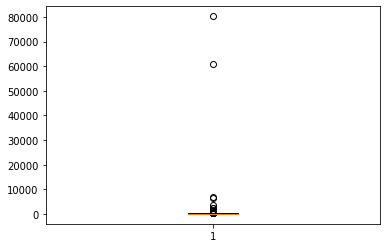

In [81]:
#checking for outliers
plt.boxplot(df['price'])

In [82]:
df['price'].quantile(q=np.arange(0, 1, .1))

0.0     15.0
0.1     67.0
0.2     86.0
0.3    102.0
0.4    120.0
0.5    139.0
0.6    151.2
0.7    179.0
0.8    200.6
0.9    260.0
Name: price, dtype: float64

90% of prices are under $260

In [83]:
df['price'].describe()

count     2738.000000
mean       216.530314
std       1933.160722
min         15.000000
25%         96.000000
50%        139.000000
75%        195.000000
max      80265.000000
Name: price, dtype: float64

In [84]:
# removing outliers by IQR method

Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1  #IQR is interquartile range. 

filter = (df['price'] >= Q1 - 1.5 * IQR) & (df['price'] <= Q3 + 1.5 *IQR)
df = df.loc[filter]

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb984bef460>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb984befb20>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb984bef100>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb984bf6220>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb984bf6520>],
 'means': []}

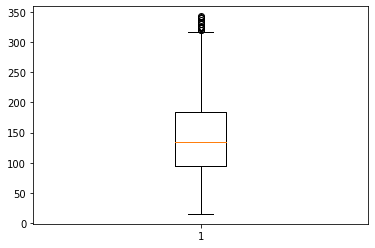

In [85]:
#Recheck 
plt.boxplot(df['price'])

In [86]:
df['price'].describe()

count    2626.000000
mean      142.807312
std        65.871137
min        15.000000
25%        95.000000
50%       135.000000
75%       184.500000
max       343.000000
Name: price, dtype: float64

In [87]:
len(data), len(df), len(data)-len(df)

(3111, 2626, 485)

A total of 485 missing and extreme data points eleminated from the dataset.

###Correlation analysis

Having multiples types of review score make it susceptible to multicolinearity problems due to the tight relationship between varibles.
Let's inscpect this assumption.

In [88]:
## correlation analysis
reviews = df[
     ['review_scores_rating',
      'review_scores_accuracy',
      'review_scores_cleanliness',
      'review_scores_checkin',
      'review_scores_communication',
      'review_scores_location',
      'review_scores_value']
      ]

In [89]:
reviews.corr().mean()

review_scores_rating           0.800018
review_scores_accuracy         0.786878
review_scores_cleanliness      0.725619
review_scores_checkin          0.732624
review_scores_communication    0.745842
review_scores_location         0.687499
review_scores_value            0.771583
dtype: float64

Correlation values are moderatly high, but not extremly high!

So, we keep them with model.

## Modeling

### Random Forest Regressor (RFR):
As the RFR does not require scaling of anay sort.

We fit the data straight forward to the model.

In [90]:
#Prepare data for modeling
y = df['price']
X = df.drop(columns = ['price', 'id'])
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = .3)

In [91]:
##Random Forest regression
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
print('RFR training score: ', rfr.score(X_train, y_train),
      '\nRFR test score:', rfr.score(X_test, y_test))

RFR training score:  0.9077525683777488 
RFR test score: 0.3516139913613684


In [38]:
#OverAll R2 score
rfr.score(X, y)

0.7461305710172087

Not bad for an untuned, blind try attempt!

The model succeed in capturing 35% of the variance in test set with only 11 out of 75 variables (14%) without prior hyperparameter tuning.

###Feature importances

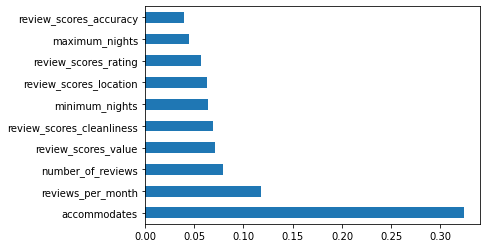

In [30]:
feat_importances = pd.Series(rfr.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')

its seems like the number of guests and number of reviews are determinent of the price.

#Saving Model to production

In [92]:
# Saving the model
save = 'rfr.pkl'
pickle.dump(rfr, open(save, 'wb'))

In [ ]:
# # Loading the model
# model_saved = pickle.load(open(save, 'rb'))

# Streamlit App

In [ ]:
!pip install streamlit

In [ ]:
# Precalculate some variables to ease calculations for the App
X.describe()

,accommodates,minimum_nights,maximum_nights,number_of_reviews,reviews_per_month,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,2626.000000,2626.000000,2626.000000,2626.000000,2626.000000,2626.000000,2626.000000,2626.000000,2626.000000,2626.000000,2626.000000,2626.000000
mean,4.232673,2.596725,601.819497,36.838919,1.748374,4.811142,4.846051,4.824764,4.908614,4.896013,4.836877,4.782232
std,2.208109,6.691229,488.870573,54.296059,1.827814,0.319227,0.311369,0.329928,0.248817,0.278076,0.271848,0.328670
min,1.000000,1.000000,1.000000,1.000000,0.020000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,40.500000,6.000000,0.530000,4.750000,4.820000,4.790000,4.910000,4.890000,4.800000,4.720000
50%,4.000000,2.000000,365.000000,17.000000,1.130000,4.900000,4.930000,4.930000,4.985000,4.980000,4.910000,4.880000
75%,6.000000,3.000000,1125.000000,45.000000,2.280000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.970000
max,16.000000,200.000000,1125.000000,582.000000,14.700000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
%%writefile app.py
import streamlit as st
import pickle
import pandas as pd
import shap
from streamlit_shap import st_shap
import numpy as np
st.set_option('deprecation.showPyplotGlobalUse', False)

st.write("""
# Airbnb Rentals\' Price Prediction App
for New Brunswick Area!
""")
st.write('---')
st.write('This is a simple exersice of\
    creating a machine learning based App with Streamlit Library.\
    \nWhere we try to predict the price of Airbnb listings per night based\
    on a reduced number of numerical features and evaluating its\
    corresponding impact on the predicition by ploting SHAP values.')


# Sidebar
# Header of Specify Input Parameters
st.title('Choose you stays\' features:')

def user_input_features():

    accommodates = st.slider('Number of guests', 
                            1, 16, 5, 1)
    maximum_nights = st.slider('Duration of the stays (in days)', 
                              1, 1125, 3, 1)
    number_of_reviews = st.slider('Number of reviews', 
                              1, 582, 36, 10)
    reviews_per_month = st.slider('Average reviews per month', 
                              1, 14, 7, 1)
    st.header('Customers\' appreciations of the rentals on a scale of 5')
    review_scores_rating = st.selectbox('Global Rating',
                               [1,2,3,4,5], 3)
    review_scores_accuracy = st.selectbox('Accuracy',
                               [0,1,2,3,4,5], 3)
    review_scores_cleanliness = st.selectbox('Cleanliness',
                               [0,1,2,3,4,5],3)
    review_scores_checkin = st.selectbox('Checkin',
                               [0,1,2,3,4,5],3)
    review_scores_communication = st.selectbox('Communication',
                               [0,1,2,3,4,5],3)
    review_scores_location = st.selectbox('Location',
                               [0,1,2,3,4,5],3)
    review_scores_value = st.selectbox('Value',
                                        [0,1,2,3,4,5],3)
    data = {
            'accommodates': accommodates,
            'maximum_nights': maximum_nights, 
            'number_of_reviews': number_of_reviews,
            'reviews_per_month': reviews_per_month,
            'review_scores_rating': review_scores_rating,
            'review_scores_accuracy': review_scores_accuracy,
            'review_scores_cleanliness': review_scores_cleanliness,
            'review_scores_checkin': review_scores_checkin,
            'review_scores_communication': review_scores_communication,
            'review_scores_location': review_scores_location,
            'review_scores_value': review_scores_value,
            }
    features = pd.DataFrame(data, index=[0])
    return features

df = user_input_features()

# Load Model from github repo
save ='/app/airbnb_rentals_ml_app/rfr.pkl' #githublink
model_saved = pickle.load(open(save, 'rb'))
# Apply Model to Make Prediction
prediction = model_saved.predict(df)

st.header('Predicted Price in USD Per Night of Stay ')

# Computing SHAP values
explainer = shap.TreeExplainer(model_saved)
shap_values = explainer.shap_values(df)

# plot the predicted price with var impact
st_shap(shap.force_plot(explainer.expected_value, shap_values, df))

#Plot detailed SHAP impact of the predicted price
st.header('Impact by SHAP values')

st.pyplot(shap.summary_plot(shap_values, df),bbox_inches='tight',dpi=500,pad_inches=0)


Writing app.py


# Conclusion



For future improvements, a consideration for:
- Integrate multiple Data Sources for:

  1- Geographical observation for Amenities near/far the rental' location.

  2- NLP analysis of writen reviews and comment to extract sentiments related appreciations of rentals

- Expand the App from single to multipage application for separate functionnalies.